# Quantum Key Distribution

## Contents

1. Introduction
2. Protocol Overview
3. Qiskit Example: Without Interception
4. Qiskit Example: With Interception
5. Risk Analysis


## 1. Introduction

Cryptology: the science of secure communicaiton
Greek Words "kryptos" means "hidden" and "logos" means "word"

Cryptography ("code making"
Cryptanalysis ("code breaking")

Aim of cryptography is to ensure secret or "secure" communication between sender and receiver. 

Cliché: 

Sender (Alice)  
Receiver (Bob)    
Intercepter (Eve) 

When Alice and Bob want to communicate a secret message (such as Bob’s online banking details) over an insecure channel (such as the internet), its essential to encrypt the message. Since cryptography is a large area and almost all of it is outside the scope of this textbook, we will have to believe that Alice and Bob having a secret key that no-one else knows is useful and allows them to communicate using symmetric-key cryptography.

If Alice and Bob want to use Eve’s classical communication channel to share their key, it is impossible to tell if Eve has made a copy of this key for herself- they must place complete trust in Eve that she is not listening. If, however, Eve provides a quantum communication channel, Alice and Bob no longer need to trust Eve at all- they will know if she tries to read Bob’s message before it gets to Alice.

For some readers, it may be useful to give an idea of how a quantum channel may be physically implemented. An example of a classical channel could be a telephone line; we send electric signals through the line that represent our message (or bits). A proposed example of a quantum communication channel could be some kind of fibre-optic cable, through which we can send individual photons (particles of light). Photons have a property call _polarisation,_ and this polarisation can be one of two states. We can use this to represent a qubit.


## 2. Protocol Overview  

The protocol makes use of the fact that measuring a qubit can change its state. If Alice sends Bob a qubit, and an eavesdropper (Eve) tries to measure it before Bob does, there is a chance that Eve’s measurement will change the state of the qubit and Bob will not receive the qubit state Alice sent. 

Let's visit our old friends Alice and Bob, who want to share a secret message. Alice can send Bob a secret message by encrypting it with a one-time-key, which is an unbreakable encryption technique. A one-time key is just that: a key that is used once. By the time a third party -- let's call her Eve, shall we? -- gets her hands on the message, Alice and Bob would have discarded that key and moved on to another. So unless Eve has access to the key, or can accurately predict the key, she cannot decrypt the message.

'Key distribution' is essentially the process of getting the key to both communicating parties while minimizing the risk of Eve gaining knowledge of the key. In different words, a key distribution protocol’s purpose is to output a key at one end (Alice's), and a good estimate of that key at the other (Bob's).

When principles of quantum physics and qubit measurements come into the picture to create secure cryptographic keys, you've got quantum key distribution. 

Quantum key distribution is essentially made up of two parts. The first is the quantum component, in which quantum principles are used to check for the presence of an eavesdropper and a raw key is generated through qubit measurements.  The second is the classical part, in which the final key is distilled from the raw key through classical post-processing. We're going to stick to the quantum part and discuss the seminal BB84 protocol proposed by Bennett and Brassard in 1984 [2].


## How the BB84 Protocol Works

BB84 is a simple "prepare and measure" protocol in which Alice prepares a sequence of qubits,  sends the qubits to Bob, and then Bob measures them. The two discard those for which the measurement bases do not match. A subset of the remaining string of bits is used to check for the presence of sneaky Eve, and the rest is used as the raw key.

The protocol works something like this:

- Alice generates a random bit string.
- Alice encodes the bits in qubit states by randomly choosing between two bases, say, the perpendicular (z) and diagonal (x) bases. Let's say she uses photons as qubits. This scenario translates to a choice between rectilinear polarization and diagonal polarization.

She follows a convention that she established before hand, perhaps something like this:
![Basis](./figures/basis1.png)

Suppose Alice generates the bit string 01101001. She then prepares a train of 8 photons in the following manner:

![Alice's Random Bits](./figures/alicebob.png)





- Alice sends the qubit sequence to Bob over a quantum channel.
- Bob randomly chooses his measurement bases.
- Alice and Bob publicize their measurement bases choices through an open communication channel, and retain those qubits for which the bases match.



- A subset of the sequence is used to check for the presence of an eavesdropper. So, if the first two bits are selected, then Alice and Bob would check if they both have the result 01. If their answers don't match, then Eve was probably snooping around. If their answers match, they can use the rest of the sequence, the second 01, as a raw key.

This is the end of the BB84 protocol, but Alice and Bob are not quite yet done with their work. They still have the classical component of QKD to work through! The key that they have at the end of the quantum part is a raw key. Usually the raw key is just that: raw with errors. A final key is distilled from the raw key through post-processing that is completely classical, because they are now working with bit strings. Post-processing includes  privacy amplification [3] and information reconcilliation [4]. 

Note that the final key needs to be at least as long as the message Alice wants to send in order for it to be used as a cryptographic key. Since the QKD process entails dropping parts of the sequence due to a basis mismatch, an eavesdrop check, and whatever is required during post-processing, the initial sequence should be much larger to account for any type of discardment [5]. 

Now let's put this into action using Qiskit, by looking at a very basic, ideal scenario. We will simplify what we've described by encoding 0's and 1's as $|0>$ and $|1>$ in the z-basis only (you can come back later to implement a convention like the one described above), and randomly choose between z and x measurements, that is, making use of the Z and H gates.

(If you are unfamiliar with quantum gates, or need a bit of a refresher, check out the Qiskit textbook [6].)



In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy.random import randint
import numpy as np
print("Imports Successful")

Imports Successful


If Alice prepares a qubit in the state $|+\rangle$ (`0` in the X-basis), and Bob measures it in the X-basis, Bob is sure to measure `0`:

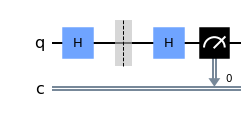

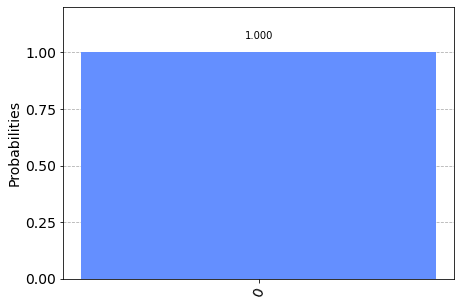

In [2]:
qc = QuantumCircuit(1,1)
# Alice prepares qubit in state |+>
qc.h(0)
qc.barrier()
# Alice now sends the qubit to Bob
# who measures it in the X-basis
qc.h(0)
qc.measure(0,0)
# Draw and simulate circuit
display(qc.draw(output='mpl'))
svs = Aer.get_backend('qasm_simulator')
job = execute(qc, svs)
plot_histogram(job.result().get_counts())

But if Eve tries to measure this qubit in the Z-basis before it reaches Bob, she will change the qubit's state from $|+\rangle$ to either $|0\rangle$ or $|1\rangle$, and Bob is no longer certain to measure `0`:

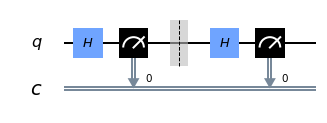

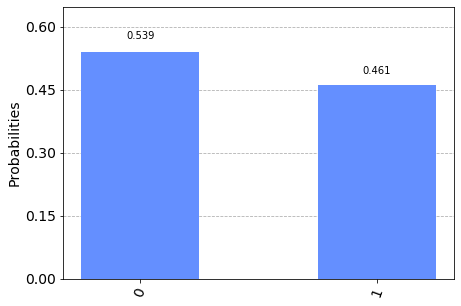

In [3]:
qc = QuantumCircuit(1,1)
# Alice prepares qubit in state |+>
qc.h(0)
# Alice now sends the qubit to Bob
# but Eve intercepts and tries to read it
qc.measure(0, 0)
qc.barrier()
# Eve then passes this on to Bob
# who measures it in the X-basis
qc.h(0)
qc.measure(0,0)

# Draw and simulate circuit
display(qc.draw(output='mpl'))
svs = Aer.get_backend('qasm_simulator')
job = execute(qc, svs)
plot_histogram(job.result().get_counts())

We can see here that Bob now has a 50% chance of measuring `1`, and if he does, he and Alice will know there is something wrong with their channel.

The quantum key distribution protocol involves repeating this process enough times that an eavesdropper has a negligible chance of getting away with this interception. It is roughly as follows:

**- Step 1**

Alice choses a string of random bits, e.g.:

`1000101011010100`

And a random choice of basis for each bit:

`ZZXZXXXZXZXXXXXX`

Alice keeps these two pieces of information private to herself. 

**- Step 2**

Alice then encodes each bit onto a string of qubits using the basis she chose, this means each qubit is in one of the states $|0\rangle$, $|1\rangle$, $|+\rangle$ or $|-\rangle$, chosen at random. In this case, the string of qubits would look like this:

$$ |-\rangle|0\rangle|+\rangle|0\rangle|1\rangle|0\rangle|1\rangle|+\rangle|1\rangle|-\rangle|+\rangle|-\rangle|0\rangle|-\rangle|0\rangle|+\rangle
$$

This is the message she sends to Bob.

**- Step 3**

Bob then measures each qubit at random, for example, he might use the bases:

`XZZZXZXZXZXZZZXZ`

And Bob keeps the measurement results private.

**- Step 4**

Bob and Alice then publicly share which basis they used for each qubit. If Bob measured a qubit in the same basis Alice prepared it in, they use this to form part of their shared secret key, otherwise they discard the information for that bit.

**- Step 5**

Finally, Bob and Alice share a random sample of their keys, and if the samples match, they can be sure (to a small margin of error) that their transmission is successful.


## 3. Qiskit Example: Without Interception

Let’s first see how the protocol works when no-one is listening in, then we can see how Alice and Bob are able to detect an eavesdropper. As always, let's start by importing everything we need:

To generate pseudo-random keys, we will use the `randint` function from numpy. To make sure you can reproduce the results on this page, we will set the seed to 0:

In [3]:
np.random.seed(seed=0)

We will call the length of Alice's initial message `n`. In this example, Alice will send a message 20 qubits long:

In [4]:
n=20

### 3.1 Step 1:

Alice generates her random set of bits:

In [5]:
np.random.seed(seed=0)
n = 20
## Step 1
# Alice generates bits
alice_bits = randint(2, size=n)
print(alice_bits)

[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1]


In [6]:
rand = randint(1,n)
print(rand)
bits = randint(2,size=n)
print(bits)

7
[1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0]


At the moment, the set of bits '`alice_bits`' is only known to Alice. We will keep track of what information is only known to Alice, what information is only known to Bob, and what has been sent over Eve's channel in a table like this:

| Alice's Knowledge |Over Eve's Channel| Bob's Knowledge |
|:-----------------:|:----------------:|:---------------:|
|     alice_bits    |                  |       &nbsp;    |

### 3.2 Step 2:

Alice chooses to encode each bit on qubit in the $X$ or $Z$-basis at random, and stores the choice for each qubit in `alice_bases`. In this case, a `0` means "prepare in the $Z$-basis", and a `1` means "prepare in the $X$-basis":

In [7]:
np.random.seed(seed=0)
n = 20
## Step 1
#Alice generates bits
alice_bits = randint(2, size=n)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
alice_bases = randint(2, size=n)
print(alice_bases)

[0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0]


Alice also keeps this knowledge private:

| Alice's Knowledge |Over Eve's Channel| Bob's Knowledge |
|:-----------------:|:----------------:|:---------------:|
|     alice_bits    |                  |                 |
|    alice_bases    |                  |     &nbsp;      |

The function `encode_message` below, creates a list of `QuantumCircuit`s, each representing a single qubit in Alice's message:

In [8]:
def encode_message(bits, bases):
    message = []
    for i in range(n):
        qc = QuantumCircuit(1,1)
        if bases[i] == 0: # Prepare qubit in Z-basis
            if bits[i] == 0:
                pass 
            else:
                qc.x(0)
        else: # Prepare qubit in X-basis
            if bits[i] == 0:
                qc.h(0)
            else:
                qc.x(0)
                qc.h(0)
        qc.barrier()
        message.append(qc)
    return message


In [9]:
np.random.seed(seed=0)
#n = 20

## Step 1
# Alice generates bits
alice_bits = randint(2, size=n)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)
print(alice_bases)

[0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0]


In [12]:
encode_message([0],[0],[1]).draw(output='mpl')

TypeError: encode_message() takes 2 positional arguments but 3 were given

We can see that the first bit in `alices_bits` is `0`, and the basis she encodes this in is the $Z$-basis (represented by `0`):

In [13]:
#for i in range(n):
print('bit = %i' % alice_bits[4])
print('basis = %i' % alice_bases[4])

bit = 1
basis = 0


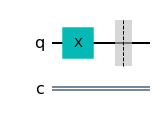

In [14]:
#for i in range(n):
message[4].draw(output='mpl')

As another example, we can see that the fifth bit in `alice_bits` is `1`, and it is encoded in the $Z$-basis, Alice prepares the corresponding qubit in the state $|1\rangle$:

bit = 1
basis = 0


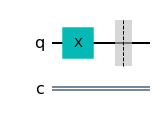

In [15]:
print('bit = %i' % alice_bits[4])
print('basis = %i' % alice_bases[4])
message[4].draw(output='mpl')

This message of qubits is then sent to Bob over Eve's quantum channel:

| Alice's Knowledge |Over Eve's Channel| Bob's Knowledge |
|:-----------------:|:----------------:|:---------------:|
|     alice_bits    |                  |                 |
|    alice_bases    |                  |                 |
|      message      |     message      |     message     |

### 3.3 Step 3:

Bob then measures each qubit in the $X$ or $Z$-basis at random and stores this information:

In [16]:
np.random.seed(seed=0)
#n = 20

## Step 1
# Alice generates bits
alice_bits = randint(2, size=n)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

## Step 3
# Decide which basis to measure in:
bob_bases = randint(2, size=n)
print(bob_bases)

[0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1]


`bob_bases` stores Bob's choice for which basis he measures each qubit in.

| Alice's Knowledge |Over Eve's Channel| Bob's Knowledge |
|:-----------------:|:----------------:|:---------------:|
|     alice_bits    |                  |                 |
|    alice_bases    |                  |                 |
|      message      |     message      |     message     |

Below, the function `measure_message`, applies the corresponding measurement and simulates the result of measuring each qubit. We store the measurement results in `bob_results`.

In [17]:
def measure_message(message, bases):
    backend = Aer.get_backend('qasm_simulator')
    measurements = []
    for q in range(n):
        if bases[q] == 0: # measuring in Z-basis
            message[q].measure(0,0)
        if bases[q] == 1: # measuring in X-basis
            message[q].h(0)
            message[q].measure(0,0)
        result = execute(message[q], backend, shots=1, memory=True).result()
        measured_bit = int(result.get_memory()[0])
        measurements.append(measured_bit)
    return measurements

In [18]:
np.random.seed(seed=0)
n = 20

## Step 1
# Alice generates bits
alice_bits = randint(2, size=n)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

## Step 3
# Decide which basis to measure in:
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)

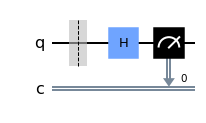

In [19]:
message[3].draw(output='mpl')

Since Bob has by chance chosen to measure in the same basis Alice encoded the qubit in, Bob is guaranteed to get the result `0`. For the 3rd qubit (shown below), Bob's random choice of measurement is not the same as Alice's, and Bob's result has only a 50% chance of matching Alices'. 

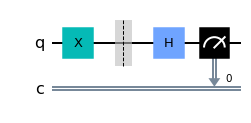

In [20]:
message[4].draw(output='mpl')

In [21]:
print(bob_results)

[0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0]


Bob keeps his results private.

| Alice's Knowledge | Over Eve's Channel | Bob's Knowledge |
|:-----------------:|:------------------:|:---------------:|
|     alice_bits    |                    |                 |
|    alice_bases    |                    |                 |
|      message      |       message      |     message     |
|                   |                    |    bob_bases    |
|                   |                    |   bob_results   |

### 3.4 Step 4:

After this, Alice reveals (through Eve's channel) which qubits were encoded in which basis: 

| Alice's Knowledge | Over Eve's Channel | Bob's Knowledge |
|:-----------------:|:------------------:|:---------------:|
|     alice_bits    |                    |                 |
|    alice_bases    |                    |                 |
|      message      |       message      |     message     |
|                   |                    |    bob_bases    |
|                   |                    |   bob_results   |
|                   |     alice_bases    |   alice_bases   |

And Bob reveals which basis he measured each qubit in:

| Alice's Knowledge | Over Eve's Channel | Bob's Knowledge |
|:-----------------:|:------------------:|:---------------:|
|     alice_bits    |                    |                 |
|    alice_bases    |                    |                 |
|      message      |       message      |     message     |
|                   |                    |    bob_bases    |
|                   |                    |   bob_results   |
|                   |     alice_bases    |   alice_bases   |
|     bob_bases     |      bob_bases     |      &nbsp;     |

If Bob happened to measure a bit in the same basis Alice prepared it in, this means the entry in `bob_results` will match the corresponding entry in `alice_bits`, and they can use that bit as part of their key. If they measured in different bases, Bob's result is random, and they both throw that entry away. Here is a function `remove_garbage` that does this for us:

In [22]:
def remove_garbage(a_bases, b_bases, bits):
    good_bits = []
    for q in range(n):
        if a_bases[q] == b_bases[q]:
            # If both used the same basis, add
            # this to the list of 'good' bits
            good_bits.append(bits[q])
    return good_bits

Alice and Bob both discard the useless bits, and use the remaining bits to form their secret keys:

In [23]:
np.random.seed(seed=0)
n = 20

## Step 1
# Alice generates bits
alice_bits = randint(2, size=n)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

## Step 3
# Decide which basis to measure in:
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)

## Step 4
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
print(alice_key)

[0, 1, 1, 1, 1, 0, 0]


| Alice's Knowledge | Over Eve's Channel | Bob's Knowledge |
|:-----------------:|:------------------:|:---------------:|
|     alice_bits    |                    |                 |
|    alice_bases    |                    |                 |
|      message      |       message      |     message     |
|                   |                    |    bob_bases    |
|                   |                    |   bob_results   |
|                   |     alice_bases    |   alice_bases   |
|     bob_bases     |      bob_bases     |                 |
|     alice_key     |                    |     &nbsp;      |

In [24]:
np.random.seed(seed=0)
n = 20

## Step 1
# Alice generates bits
alice_bits = randint(2, size=n)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

## Step 3
# Decide which basis to measure in:
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)

## Step 4
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
print(bob_key)

[0, 1, 1, 1, 1, 0, 0]


| Alice's Knowledge | Over Eve's Channel | Bob's Knowledge |
|:-----------------:|:------------------:|:---------------:|
|     alice_bits    |                    |                 |
|    alice_bases    |                    |                 |
|      message      |       message      |     message     |
|                   |                    |    bob_bases    |
|                   |                    |   bob_results   |
|                   |     alice_bases    |   alice_bases   |
|     bob_bases     |      bob_bases     |                 |
|     alice_key     |                    |     bob_key     |

### 3.5 Step 5:

Finally, Bob and Alice compare a random selection of the bits in their keys to make sure the protocol has worked correctly:

In [25]:
def sample_bits(bits, selection):
    sample = []
    for i in selection:
        # use np.mod to make sure the
        # bit we sample is always in 
        # the list range
        i = np.mod(i, len(bits))
        # pop(i) removes the element of the
        # list at index 'i'
        sample.append(bits.pop(i))
    return sample

Alice and Bob both broadcast these publicly, and remove them from their keys as they are no longer secret:

In [26]:
np.random.seed(seed=0)
n = 20

## Step 1
# Alice generates bits
alice_bits = randint(2, size=n)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

## Step 3
# Decide which basis to measure in:
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)

## Step 4
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)

## Step 5
sample_size = 2
bit_selection = randint(n, size=sample_size)

bob_sample = sample_bits(bob_key, bit_selection)
print("  bob_sample = " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print("alice_sample = "+ str(alice_sample))

  bob_sample = [1, 0]
alice_sample = [1, 0]


| Alice's Knowledge | Over Eve's Channel | Bob's Knowledge |
|:-----------------:|:------------------:|:---------------:|
|     alice_bits    |                    |                 |
|    alice_bases    |                    |                 |
|      message      |       message      |     message     |
|                   |                    |    bob_bases    |
|                   |                    |   bob_results   |
|                   |     alice_bases    |   alice_bases   |
|     bob_bases     |      bob_bases     |                 |
|     alice_key     |                    |     bob_key     |
|     bob_sample    |     bob_sample     |    bob_sample   |
|    alice_sample   |    alice_sample    |   alice_sample  |

If the protocol has worked correctly without interference, their samples should match:

In [27]:
bob_sample == alice_sample

True

If their samples match, it means (with high probability) `alice_key == bob_key`. They now share a secret key they can use to encrypt their messages!

| Alice's Knowledge | Over Eve's Channel | Bob's Knowledge |
|:-----------------:|:------------------:|:---------------:|
|     alice_bits    |                    |                 |
|    alice_bases    |                    |                 |
|      message      |       message      |     message     |
|                   |                    |    bob_bases    |
|                   |                    |   bob_results   |
|                   |     alice_bases    |   alice_bases   |
|     bob_bases     |      bob_bases     |                 |
|     alice_key     |                    |     bob_key     |
|     bob_sample    |     bob_sample     |    bob_sample   |
|    alice_sample   |    alice_sample    |   alice_sample  |
|     shared_key    |                    |    shared_key   |

In [28]:
print(bob_key)
print(alice_key)
print("key length = %i" % len(alice_key))

[0, 1, 1, 1, 0]
[0, 1, 1, 1, 0]
key length = 5
